In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt(open('s0513_15 end on ne.txt',"r"),delimiter=",")

In [3]:
def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout
def mm_to_px(mm_coords, scale, origin):
    return (mm_coords[0]*scale+origin[0], mm_coords[1]*scale+origin[1])

In [4]:
def radial_lineout(R0, y0, sign, th, data, origin, scale):
    sta=(sign*(y0-R0*np.cos(th*np.pi/180.0)),R0*np.sin(th*np.pi/180.0))
    sto=(0,y0*np.tan(th*np.pi/180.0))
    sta_px=mm_to_px(sta, scale, origin)
    sto_px=mm_to_px(sto, scale, origin)
    lo=lineout(data, sta_px, sto_px)
    mm_axis=np.linspace(R0, R0+lo.size/scale, lo.size)
    return mm_axis, lo

In [ ]:
origin=(1420,2500)
scale=173.0#px/mm
y0=13.5
R0=8.5#array radius
angles=np.array([-22.5,0,22.5])+1.0
ang_color={'-22.5':'r', '0':'k','22.5':'b'}
xs=[]
rls=[]
fig, ax1=plt.subplots(figsize=(16,10))

for s in [+1,-1]:
    for th in angles:
        if s==+1:
            half='Lower:'
            ls='-'
        if s==-1:
            half='Upper:'
            ls=':'
        x, rl=radial_lineout(R0=R0, y0=y0, sign=s, th=th, data=data,origin=origin, scale=scale)
        ax1.plot(x,rl/1e17, label=half+r'$\theta=$'+str(th)+r'$^{\circ}$', lw=5, ls=ls, color=ang_color[str(th)])
        xs.append(x)
        rls.append(rl)
    
ax1.set_xlabel('Distance from array centre (mm)', fontsize=32)
ax1.set_ylabel(r'$\int \,n_e dx \,(\times 10^{17}\,cm^{-2})$',fontsize=32)
ax1.set_ylim([0, 12])
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.legend(fontsize=20)
ax1.set_title(r'Radial lineouts',fontsize=30, y=1.02, )

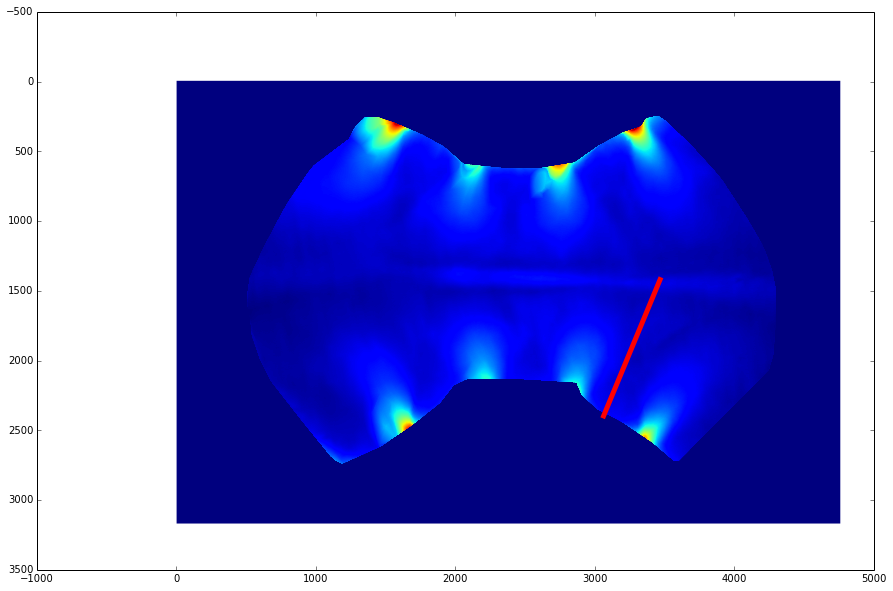

In [79]:
origin=(1420,2500)
scale=173.0#px/mm
y0=13.5
R0=8.5#array radius
sign=+1#+ for bottom array, - for top array
th=25#angle with respect to y axis
sta=(sign*(y0-R0*np.cos(th*np.pi/180.0)),R0*np.sin(th*np.pi/180.0))
sto=(0,y0*np.tan(th*np.pi/180.0))
sta_px=mm_to_px(sta, scale, origin)
sto_px=mm_to_px(sto, scale, origin)

fig, ax=plt.subplots(figsize=(16,10))
im=ax.imshow(data)
li=ax.plot([sta_px[1],sto_px[1]],[sta_px[0],sto_px[0]], lw=5, color='r')